In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [129]:
datos = pd.read_csv("/content/Datos_telecom_tratados.csv")

In [130]:
datos.head()

,Unnamed: 0,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_label
0,0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,Clientes dados de baja
1,1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,Clientes dados de baja
2,2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,Clientes conservados
3,3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,Clientes conservados
4,4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,Clientes conservados


In [131]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7267 non-null   int64  
 1   customerID                 7267 non-null   object 
 2   Churn                      7043 non-null   object 
 3   customer.gender            7267 non-null   object 
 4   customer.SeniorCitizen     7267 non-null   int64  
 5   customer.Partner           7267 non-null   object 
 6   customer.Dependents        7267 non-null   object 
 7   customer.tenure            7267 non-null   int64  
 8   phone.PhoneService         7267 non-null   object 
 9   phone.MultipleLines        7267 non-null   object 
 10  internet.InternetService   7267 non-null   object 
 11  internet.OnlineSecurity    7267 non-null   object 
 12  internet.OnlineBackup      7267 non-null   object 
 13  internet.DeviceProtection  7267 non-null   objec

In [132]:
variables_no_relevantes=['Unnamed: 0','customerID']
datos.drop(variables_no_relevantes,axis=1,inplace=True)

In [133]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

In [134]:
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_label
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,Clientes dados de baja
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,Clientes dados de baja
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,Clientes conservados
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,Clientes conservados
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,Clientes conservados


In [135]:
variables_categoricas = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

##**REALIZAMOS EL ENCODING USANDO ONE-HOT ENCODING**

In [136]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_array = encoder.fit_transform(datos[variables_categoricas])

In [137]:
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(variables_categoricas),
    index=datos.index
)

In [138]:
datos_encoded = pd.concat(
    [datos.drop(columns=variables_categoricas), encoded_df],
    axis=1
)

In [139]:
print("Dimensiones antes:", datos.shape)
print("Dimensiones después:", datos_encoded.shape)
print(datos_encoded.head())

Dimensiones antes: (7267, 22)
Dimensiones después: (7267, 27)
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Cuentas_Diarias             Churn_label  Churn_Yes  \
0                 593.30             2.19  Clientes dados de baja        0.0   
1                 542.40             2.00  Clientes dados de baja        0.0   
2                 280.85             2.46    Clientes conservados        1.0   
3                1237.85             3.27    Clientes conservados        1.0   
4                 267.40             2.80    Clientes conservados        1.0   

   Churn_nan  customer.gender_

###**VERIFICACION DE LA PROPORCION DE CANCELACION**

In [140]:
proporcion = datos["Churn"].value_counts(normalize=True)

print(proporcion)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


###**BALANCEO DE CLASES**

Oversampling

In [141]:
print(datos_encoded.columns)

Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias', 'Churn_label', 'Churn_Yes',
       'Churn_nan', 'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_Yes', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')


In [142]:
X_clean = X.dropna()
y_clean = y[X_clean.index]

In [143]:
from imblearn.over_sampling import SMOTE
X = datos_encoded.drop(columns=['Churn_Yes', 'Churn_label', 'Churn_nan'])
y = datos_encoded['Churn_Yes']

In [144]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

In [145]:
print(pd.Series(y_resampled).value_counts())

Churn_Yes
0    5163
1    5163
Name: count, dtype: int64


###**VALIDAR QUE NO HAYA DATOS NULOS**

In [146]:
print(pd.DataFrame(y_resampled).isna().sum())

Churn_Yes    0
dtype: int64


In [147]:
print(pd.DataFrame(X_resampled).isna().sum())

customer.SeniorCitizen                           0
customer.tenure                                  0
account.Charges.Monthly                          0
account.Charges.Total                            0
Cuentas_Diarias                                  0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_Yes                    0
internet.TechSupport_Yes                         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_Yes                     0
account.Contract_One year                        0
account.Contract_Two year      

###**ANALISIS DE CORRELACION**

In [148]:
datos_encoded['Churn_num'] = datos_encoded['Churn_label'].map({
    'Clientes dados de baja': 0,
    'Clientes conservados': 1
})

In [149]:
numericas = datos_encoded.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr = numericas.corr()

In [150]:
corr_churn = corr['Churn_Yes']
print(corr_churn.sort_values(ascending=False))

Churn_Yes                                        1.000000
Churn_num                                        1.000000
internet.InternetService_Fiber optic             0.300949
account.PaymentMethod_Electronic check           0.294626
Cuentas_Diarias                                  0.189918
account.Charges.Monthly                          0.189866
account.PaperlessBilling_Yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_Yes                         0.062430
internet.StreamingMovies_Yes                     0.060586
phone.MultipleLines_Yes                          0.039343
phone.PhoneService_Yes                           0.012571
customer.gender_Male                            -0.009555
internet.DeviceProtection_Yes                   -0.063452
internet.OnlineBackup_Yes                       -0.080163
account.PaymentMethod_Mailed check              -0.090061
Churn_nan                                       -0.104938
account.Paymen

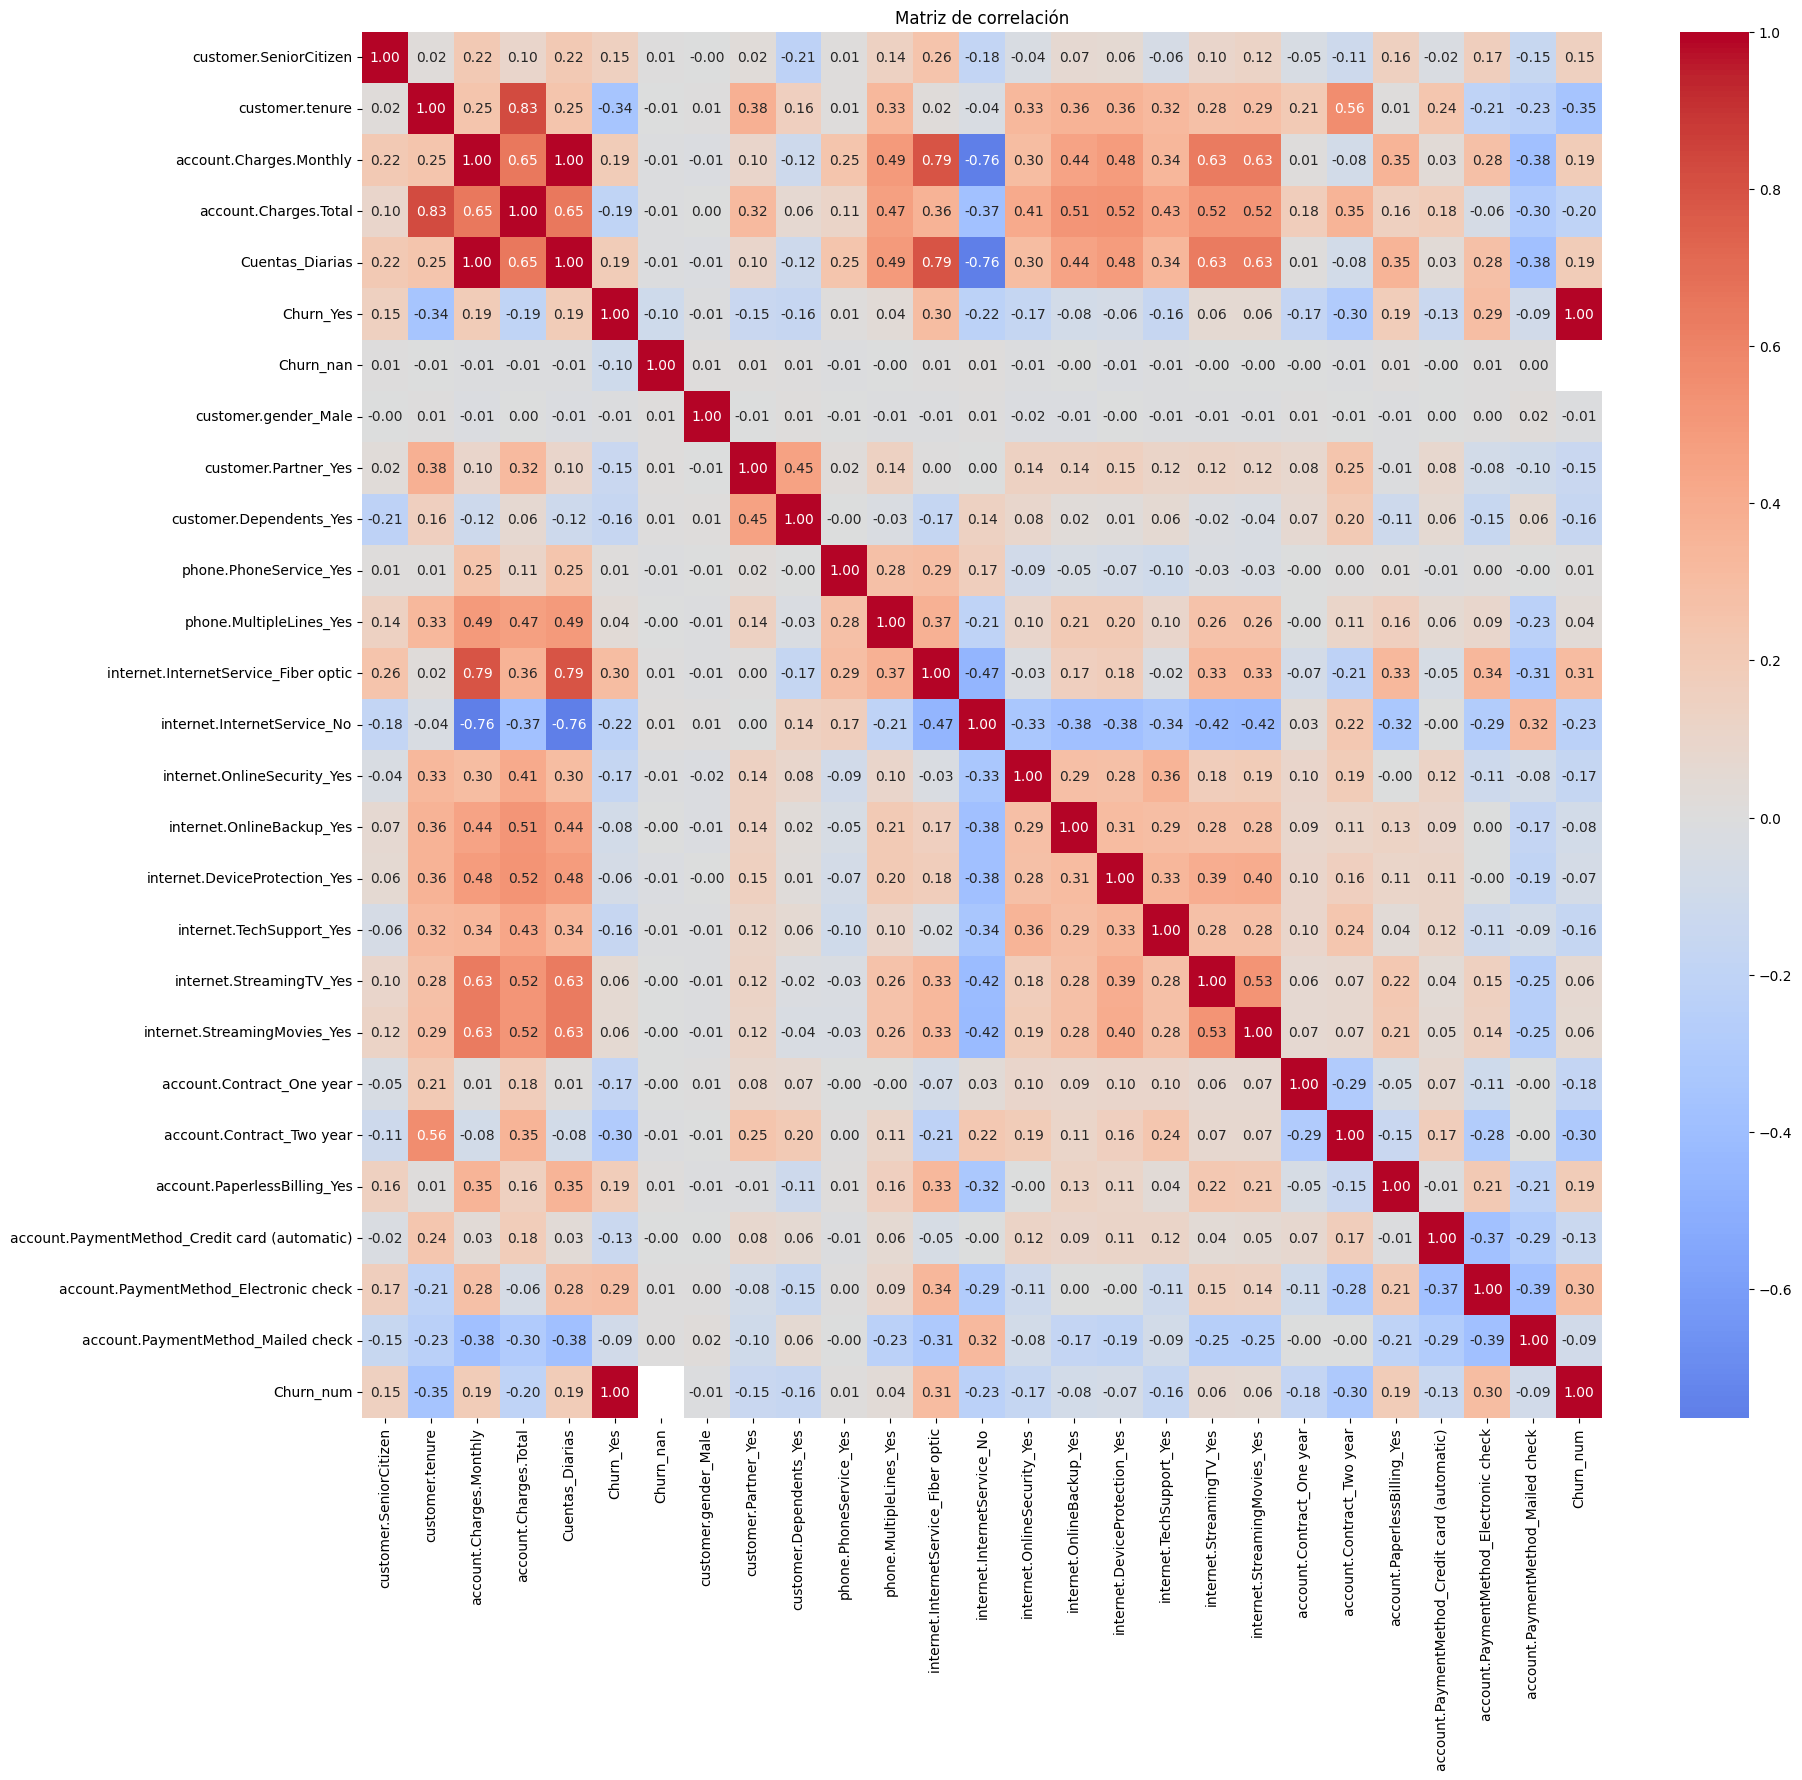

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

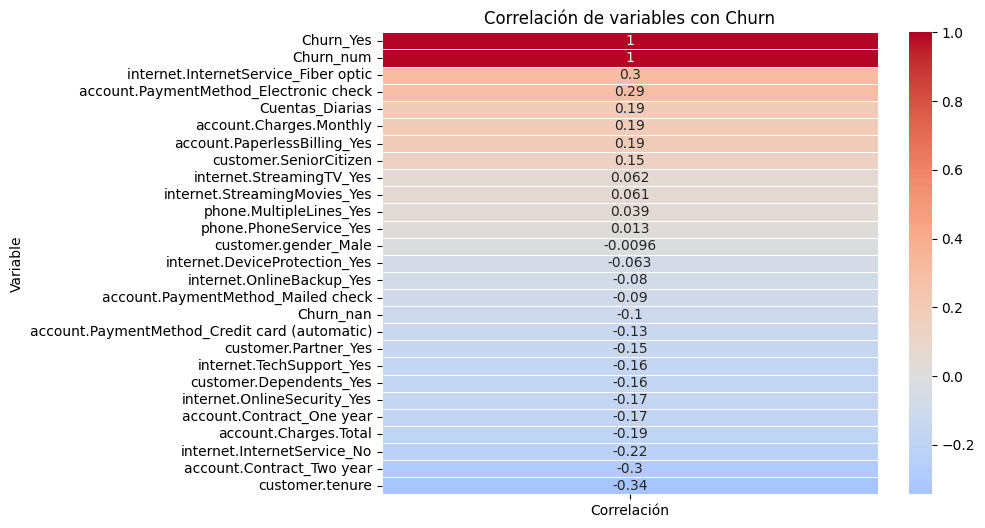

In [152]:
numericas = datos_encoded.select_dtypes(include=['float64', 'int64'])

# Correlación con Churn
corr_churn = numericas.corr()['Churn_Yes'].sort_values(ascending=False)  # o 'Churn_num' si mapeaste

# Convertimos a DataFrame para seaborn
corr_churn_df = corr_churn.reset_index()
corr_churn_df.columns = ['Variable', 'Correlación']

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(corr_churn_df.set_index('Variable'), annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlación de variables con Churn")
plt.show()

###**SELECCIONANDO VARIABLES**

/tmp/ipython-input-1983894579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


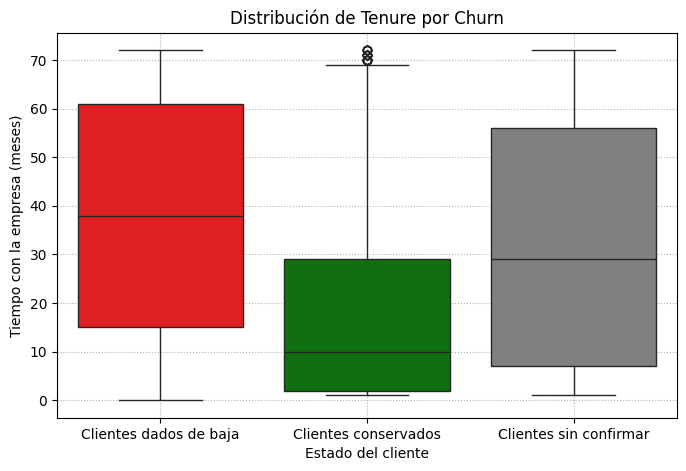

In [153]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Churn_label',
    y='customer.tenure',
    data=datos,
    palette=['red', 'green', 'gray']
)

plt.xlabel('Estado del cliente')
plt.ylabel('Tiempo con la empresa (meses)')
plt.title('Distribución de Tenure por Churn')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.show()

/tmp/ipython-input-2202253289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


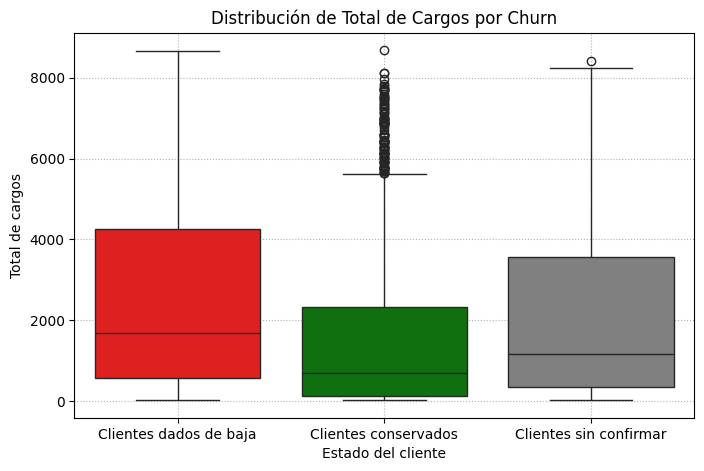

In [154]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Churn_label',            # estado del cliente
    y='account.Charges.Total',   # cargos totales del cliente
    data=datos,
    palette=['red', 'green', 'gray']  # rojo = baja, verde = conservados, gris = sin confirmar
)

plt.xlabel('Estado del cliente')
plt.ylabel('Total de cargos')
plt.title('Distribución de Total de Cargos por Churn')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X = datos_encoded.drop(['Churn_label', 'Churn_nan', 'Churn_Yes'], axis=1, errors='ignore')

y = datos_encoded['Churn_Yes']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [158]:
print(f"Tamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")

Tamaño entrenamiento: 5086 filas
Tamaño prueba: 2181 filas


###**CREACION DE MODELOS DE REGRESION LOGICA ARBOL DE DESICION**

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo (sin limitar la profundidad)
arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
arbol.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_arbol = arbol.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_arbol))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_arbol))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_arbol))

Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1549
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Matriz de confusión:
 [[1549    0]
 [   0  561]]


In [238]:
# Crear el modelo (sin limitar la profundidad)
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
arbol.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_arbol_2 = arbol.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_arbol_2))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_arbol_2))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_arbol_2))

Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1549
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Matriz de confusión:
 [[1549    0]
 [   0  561]]


###**REGRESION LOGICA (KNN)**

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [224]:
print("Valores NaN por columna:\n", datos_encoded.isna().sum())

Valores NaN por columna:
 customer.SeniorCitizen                             0
customer.tenure                                    0
account.Charges.Monthly                            0
account.Charges.Total                             11
Cuentas_Diarias                                    0
Churn_label                                        0
Churn_Yes                                          0
Churn_nan                                          0
customer.gender_Male                               0
customer.Partner_Yes                               0
customer.Dependents_Yes                            0
phone.PhoneService_Yes                             0
phone.MultipleLines_Yes                            0
internet.InternetService_Fiber optic               0
internet.InternetService_No                        0
internet.OnlineSecurity_Yes                        0
internet.OnlineBackup_Yes                          0
internet.DeviceProtection_Yes                      0
internet.TechSupport

In [225]:
datos_clean = datos_encoded.dropna()
print("\nDatos después de eliminar NaN:", datos_clean.shape)


Datos después de eliminar NaN: (7032, 28)


In [226]:
y = datos_clean['Churn_Yes']

In [228]:
X = datos_clean.drop(['Churn_label', 'Churn_Yes', 'Churn_nan'], axis=1)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

###**ESTANDARIZACION DE DATOS**

In [230]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [239]:
y_pred_regression = logreg.predict(X_test_scaled)

In [240]:
print("=== Regresión Logica ===")
print("Accuracy:", accuracy_score(y_test, y_pred_regression))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_regression))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_regression))

=== Regresión Logica ===
Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1549
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Matriz de confusión:
 [[1549    0]
 [   0  561]]


###**EVALUACION DE MODELOS**

####**ARBOL DE DECISION**

In [242]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_arbol_2))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_arbol_2))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_arbol_2))

Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1549
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Matriz de confusión:
 [[1549    0]
 [   0  561]]


####**REGRESION LOGICA**

In [241]:
print("Accuracy:", accuracy_score(y_test, y_pred_regression))
print("\nReporte de clasificación:\n", classification_report(y_test,y_pred_regression))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_regression))

Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1549
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Matriz de confusión:
 [[1549    0]
 [   0  561]]
